In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


###  Looking at Data types

In [3]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

### Looking  if there is empty data

In [4]:
(df.isna().sum()/len(df))*100



customer_id                       0.000000
vintage                           0.000000
age                               0.000000
gender                            1.849764
dependents                        8.678035
occupation                        0.281869
city                              2.829258
customer_nw_category              0.000000
branch_code                       0.000000
current_balance                   0.000000
previous_month_end_balance        0.000000
average_monthly_balance_prevQ     0.000000
average_monthly_balance_prevQ2    0.000000
current_month_credit              0.000000
previous_month_credit             0.000000
current_month_debit               0.000000
previous_month_debit              0.000000
current_month_balance             0.000000
previous_month_balance            0.000000
churn                             0.000000
last_transaction                  0.000000
dtype: float64

### Conclusions:
* gender (type: categorical): 1.8 percent missing
* dependents (type: float): 8 percent  is missing, should be int
* occupation (type: categorical): 0.28 percent is missing
* city (type:  float ); 2 percent data are missing Most probably city codes should be int

### Next step is to change / alter the data types to numerical or categorical
- customer_id : need not be changed
- age : 
    - type:int  
    - desired type: int
- gender :
    - type :object 
    - desired type: categorical
- dependents: 
    - type :float64 
    - desired type:int
- occupation: 
    - type : objective 
    - desired type : categorical
- city: 
    - type :float 64 
    - desired type: categorical
- customer_nw_category : 
    - type: int64
    - desired type: categorical
- branch code :
    - type: int64
    - desired type: categorical
- last_transaction:
    - type : object
    - desired type: date time

df['gender']=df['gender'].astype('category')
df['dependents']=df['dependents'].astype('int64')
df['occupation']=df['occupation'].astype('category')
df['city']=df['city'].astype('int64')
df['city']=df['city'].astype('category')
df['customer_nw_category']=df['customer_nw_category'].astype('category')
df['branch_code']=df['branch_code'].astype('category')
df['last_transaction']=pd.to_datetime(df['last_transaction'])




In [5]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

##### Conclusion
- After converting to date time we notic that there are missing values
- We extract day day of month , day of week,year
- We will solve that in missing value treatment

In [6]:
df['last_transaction']=pd.to_datetime(df['last_transaction'])
df['day_of_ls']=df['last_transaction'].dt.day
df['day_of_week_of_ls']=df['last_transaction'].dt.dayofweek
df['month_of_ls']=df['last_transaction'].dt.month
df['year_of_ls']=df['last_transaction'].dt.year



In [7]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                  3223
day_of_ls                         3223
day_of_week_of_ls                 3223
month_of_ls                       3223
year_of_ls                        3223
dtype: int64

In [8]:
df=df.drop(columns=['last_transaction'],axis=1)
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,day_of_ls,day_of_week_of_ls,month_of_ls,year_of_ls
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,21.0,1.0,5.0,2019.0
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,1.0,4.0,11.0,2019.0
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,6.0,1.0,8.0,2019.0
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,3.0,6.0,11.0,2019.0


In [9]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
day_of_ls                         float64
day_of_week_of_ls                 float64
month_of_ls                       float64
year_of_ls                        

In [10]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
day_of_ls                         3223
day_of_week_of_ls                 3223
month_of_ls                       3223
year_of_ls                        3223
dtype: int64

In [11]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
day_of_ls                         float64
day_of_week_of_ls                 float64
month_of_ls                       float64
year_of_ls                        

## We perform Univariate Analysis
- It would be very easy if we can devide into groups

In [12]:
customer_details = ['customer_id','age','vintage',]
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['day_of_ls','day_of_week_of_ls','month_of_ls','year_of_ls']
categorical_values=df.select_dtypes(include=['category']).columns.tolist()

In [13]:
def Univariate_numerical(data,var_group):
    plt.figure(figsize=(10,10),dpi=140)
    size=len(var_group)
    for j,i in enumerate(var_group):
        # We write measures of central tendencies
        avg=data[i].mean()
        med=data[i].median()
        maxi=data[i].max()
        mini=data[i].min()
        rnge=maxi-mini 
        stand_dev=data[i].std()
        skw=data[i].skew()
        kurt=data[i].kurtosis()
        points=(avg-stand_dev,avg+stand_dev)
        plt.subplot(size,1,j+1) 
        sns.kdeplot(data[i],fill=True)
        sns.scatterplot(x=[avg],y=[0],color='blue',label='Mean',markers='^')
        sns.scatterplot(x=[stand_dev],y=[0],color='red',label='Std_dev',markers='s') 
        sns.lineplot(x=[mini,maxi],y=[0,0], color='green',label='range')
        plt.xlabel('{}'.format(i),fontsize=10)
        plt.ylabel('density')
        plt.title('AVG :{} ,Med :{};\n Std_dev :{}, Kurt={} ,Skew={} ;\n points_of std={}'
                  .format(round(avg,2),round(med,2),round(stand_dev,2),round(kurt,2),round(skw,2),
                         (round(points[0],2),round(points[1],2))))
        plt.subplots_adjust(hspace=1.0)
        
                        
        
        

#### Customer_details:

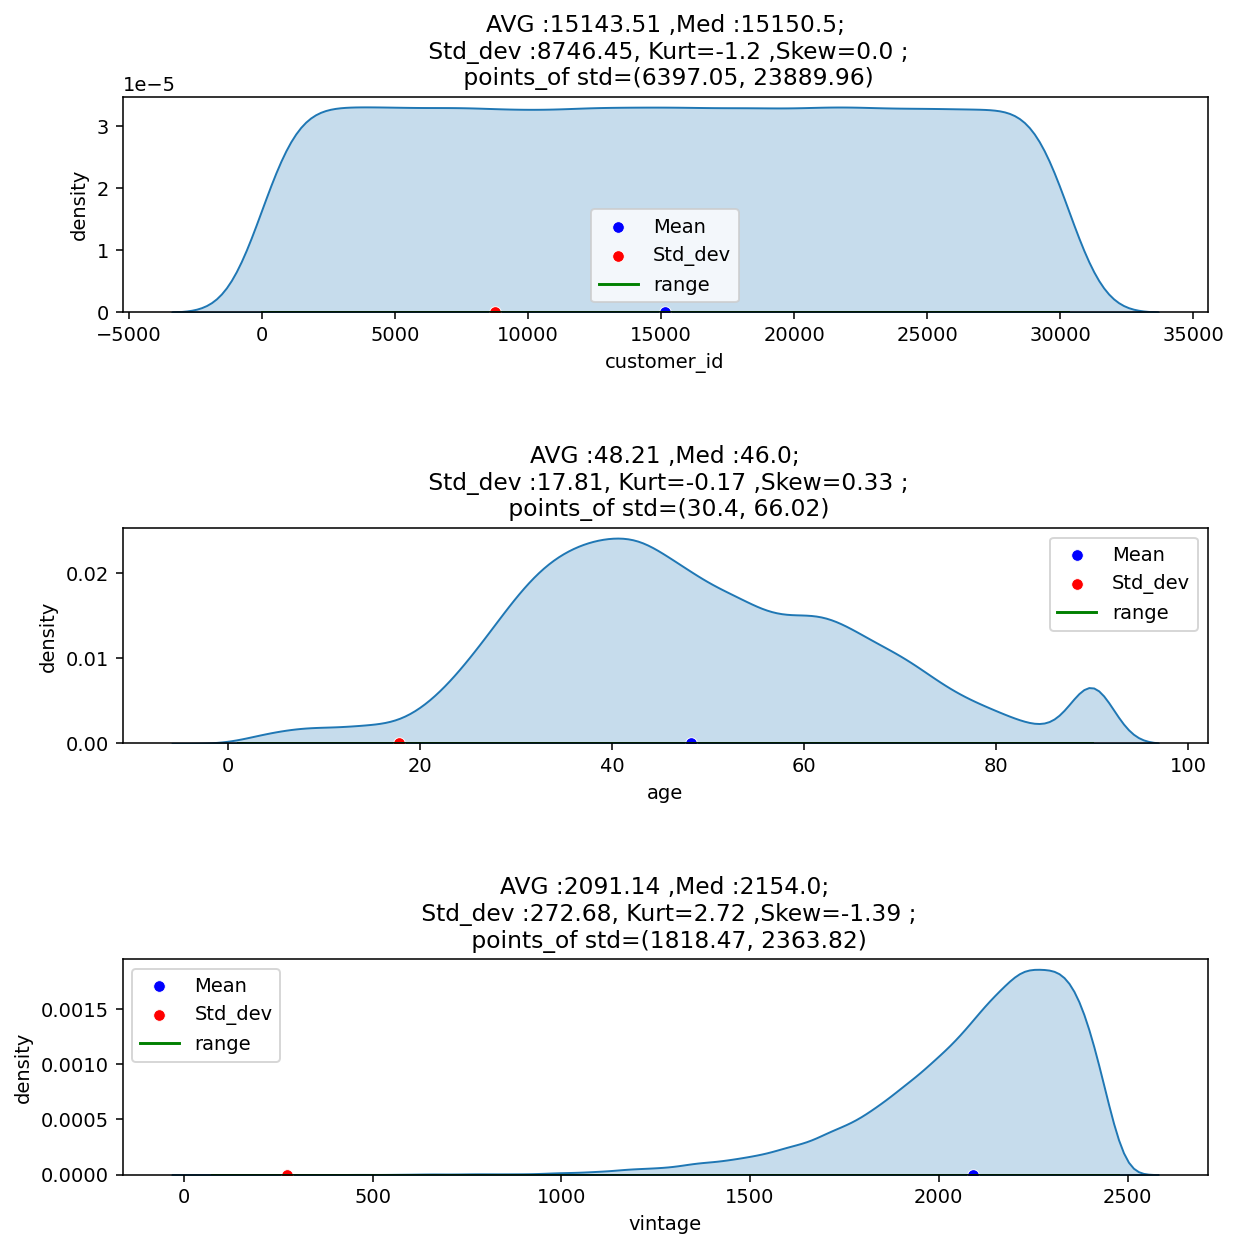

In [14]:
Univariate_numerical(df,customer_details)

#### Conclusion/Remarks:
- Customer_id:
  - Kurtosis : slight negative kurtosis can be considered  negligible
  - Skew : Zero Almost normal distiribution
- Age:
  - Kurtosis : slight negative kurtosis can be considered  negligible
  - Skew : Sligh positive skew can be considered negligible
- Customer_id:
  - Kurtosis : slight a little higher kurtosis can be considered  negligible
  - Skew : Slight Negative Skew negligible



#### Current Month

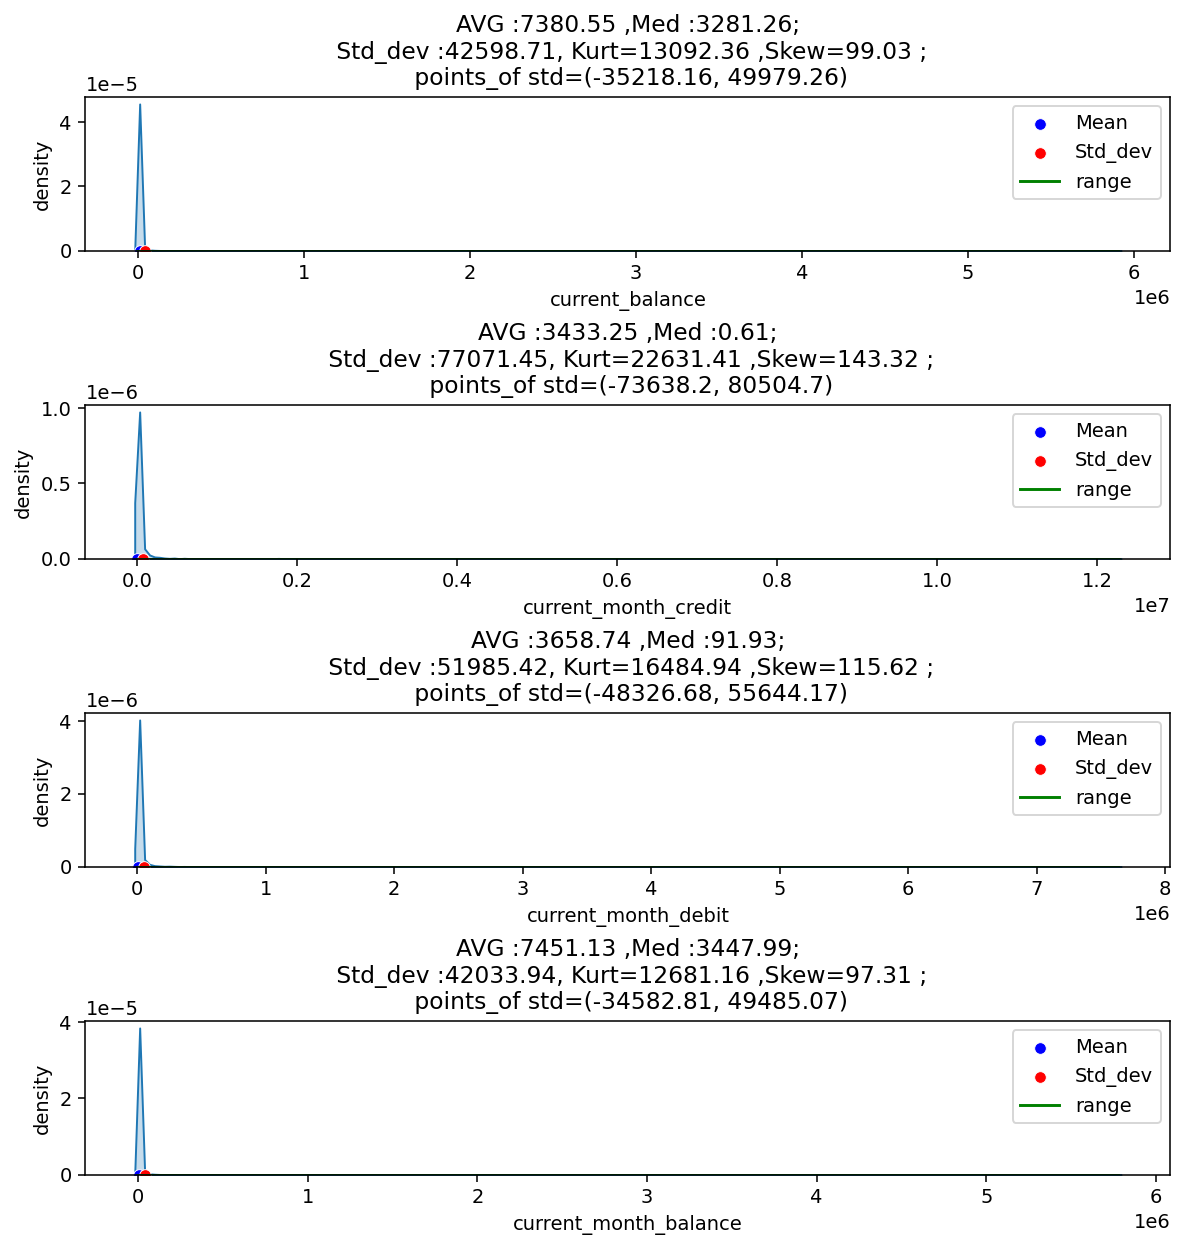

In [15]:
Univariate_numerical(df,current_month)

#### Conclusion/Remarks:
- Current_balance:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin
- Current_month_credit:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin
- Current_month_credit:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin 
- Current_month_debit:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin

#### Previous_month

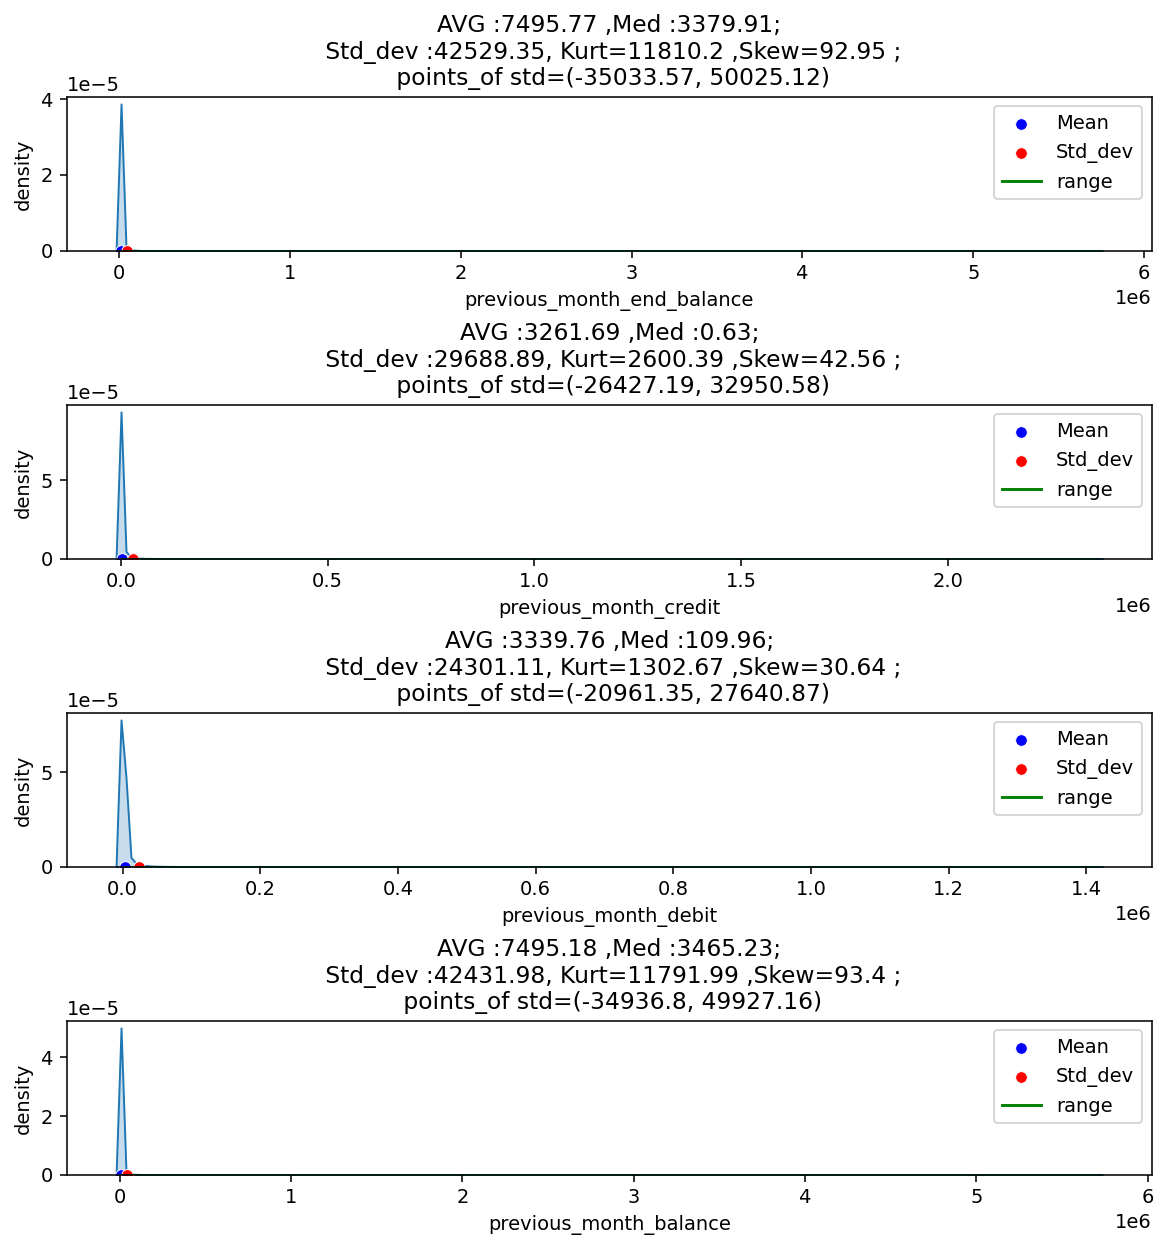

In [16]:
Univariate_numerical(df,previous_month)

#### Conclusion/Remarks:
- Previous Month end Balance:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin
- Previous_month_credit:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin
- Previous_month_debit:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin 
- Previous_month_balance:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin

#### Previous Quarters

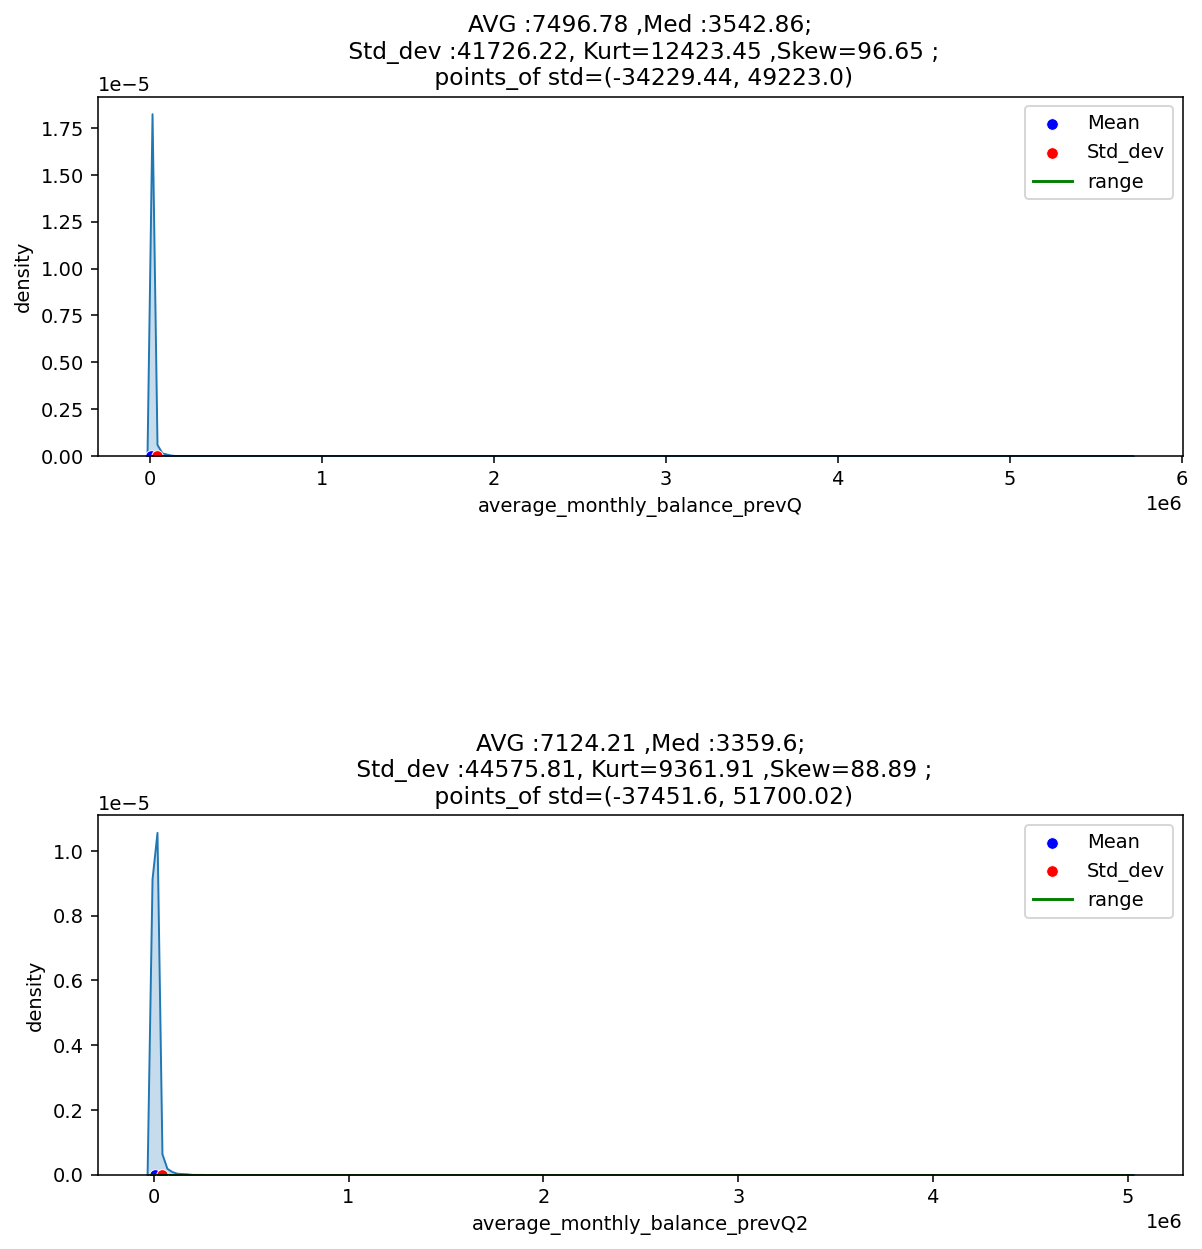

In [17]:
Univariate_numerical(df,previous_quarters)

#### Conclusion/Remarks:
- Average_monthly_balance_prevQ:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin
- Average_monthly_balance_prevQ:
  - Kurtosis : Highly positive kurtosis , therefore high presence outliers accounts
  - Skew : right skewed by a good margin

### Univariate Analysis Categorical

In [18]:
def Univariate_categorical(data,var_group):
    size=len(var_group)
    plt.figure(figsize=(10,10))
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()

      #Plotting the variable with every information
        plt.subplot(size,1,j+1)
        sns.barplot(x=norm_count,y= norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
        plt.subplots_adjust(hspace=0.5)


In [19]:
Univariate_categorical(df,categorical_values)

<Figure size 1000x1000 with 0 Axes>

#### CONCLUSION
- No need to ploty city and  Branches, It is too vast and too much spread out

### BIVARIATE ANLYSIS

In [20]:
df=df.drop(columns=['customer_id'],axis=1)

### Numerical-Numerical

In [21]:
numerical_variables=df.select_dtypes(include=['int64','float64'])
numerical_variables



,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,day_of_ls,day_of_week_of_ls,month_of_ls,year_of_ls
0,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,...,0.20,0.20,0.20,1458.71,1458.71,0,21.0,1.0,5.0,2019.0
1,2348,35,0.0,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,...,0.56,5486.27,100.56,6496.78,8787.61,0,1.0,4.0,11.0,2019.0
2,2194,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,2329,90,NaN,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,...,0.47,0.47,2143.33,2291.91,1669.79,1,6.0,1.0,8.0,2019.0
4,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,...,714.61,588.62,1538.06,1157.15,1677.16,1,3.0,6.0,11.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,2325,10,0.0,1020.0,2,1207,1076.43,1076.43,2282.19,2787.70,...,0.30,0.30,0.30,1076.43,1076.43,0,22.0,1.0,10.0,2019.0
28378,1537,34,0.0,1046.0,2,223,3844.10,4069.21,3668.83,3865.55,...,2.29,901.00,1014.07,3738.54,3690.32,0,17.0,1.0,12.0,2019.0
28379,2376,47,0.0,1096.0,2,588,65511.97,61017.55,53444.81,21925.81,...,3883.06,168.23,71.80,61078.50,57564.24,1,31.0,1.0,12.0,2019.0
28380,1745,50,3.0,1219.0,3,274,1625.55,1625.55,1683.20,1857.42,...,0.20,0.20,0.20,1625.55,1625.55,0,NaN,NaN,NaN,NaN


#### Correlation

In [22]:
correlation=numerical_variables.dropna().corr()
correlation

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,day_of_ls,day_of_week_of_ls,month_of_ls,year_of_ls
vintage,1.000000,0.003212,0.005126,0.006336,0.000631,0.002343,-0.007444,-0.008176,-0.010997,-0.003825,...,-0.000758,-0.005140,-0.008253,-0.008962,-0.010513,-0.007019,0.006272,-0.008780,-0.002479,-0.000260
age,0.003212,1.000000,-0.004132,0.014448,-0.077845,-0.066683,0.057855,0.061578,0.069833,0.081047,...,0.027527,0.025093,0.027076,0.061973,0.066546,-0.028517,-0.008623,-0.019801,0.012711,0.007230
dependents,0.005126,-0.004132,1.000000,0.000641,0.011654,0.018951,-0.004402,-0.000815,0.000146,0.002800,...,0.022981,0.006820,0.029014,-0.001773,0.000323,0.028278,0.027294,-0.001239,0.077657,0.003396
city,0.006336,0.014448,0.000641,1.000000,0.004268,-0.063632,-0.002351,-0.000925,-0.002783,-0.003385,...,0.006452,0.002007,0.006734,-0.003247,-0.001891,-0.002960,-0.005810,-0.002242,0.005368,0.001040
customer_nw_category,0.000631,-0.077845,0.011654,0.004268,1.000000,0.231860,-0.110383,-0.106599,-0.108728,-0.130320,...,-0.077767,-0.035164,-0.078973,-0.109466,-0.103920,0.008982,-0.023531,0.013315,-0.047937,0.002953
branch_code,0.002343,-0.066683,0.018951,-0.063632,0.231860,1.000000,-0.024663,-0.022427,-0.020721,-0.021795,...,-0.025636,-0.016697,-0.018799,-0.022787,-0.019547,0.033300,-0.009179,0.007050,-0.018077,-0.000488
current_balance,-0.007444,0.057855,-0.004402,-0.002351,-0.110383,-0.024663,1.000000,0.808083,0.856261,0.581010,...,0.101875,0.075600,0.153244,0.939750,0.811225,-0.039481,0.024425,0.000584,0.032830,0.000436
previous_month_end_balance,-0.008176,0.061578,-0.000815,-0.000925,-0.106599,-0.022427,0.808083,1.000000,0.907379,0.659308,...,0.195421,0.100436,0.193573,0.909747,0.911579,0.017305,0.008316,0.003131,0.022998,0.000554
average_monthly_balance_prevQ,-0.010997,0.069833,0.000146,-0.002783,-0.108728,-0.020721,0.856261,0.907379,1.000000,0.730351,...,0.139360,0.091607,0.188285,0.920387,0.983764,0.028235,0.003643,0.001794,0.020471,0.000572
average_monthly_balance_prevQ2,-0.003825,0.081047,0.002800,-0.003385,-0.130320,-0.021795,0.581010,0.659308,0.730351,1.000000,...,0.128759,0.099086,0.164319,0.639991,0.700297,0.036077,0.011837,-0.001014,0.008348,0.000701


#### Plotting Heatmap of different correlatons
 Correlation types:
 - Perason: large data, but very sensitive to outliers
 - Kendall- Preferred for Non Normal data and outliers
 - Spearman : Sensitive and cannot be used for ouliers 
  Preference to be given  for Kendall , but we will do all 3

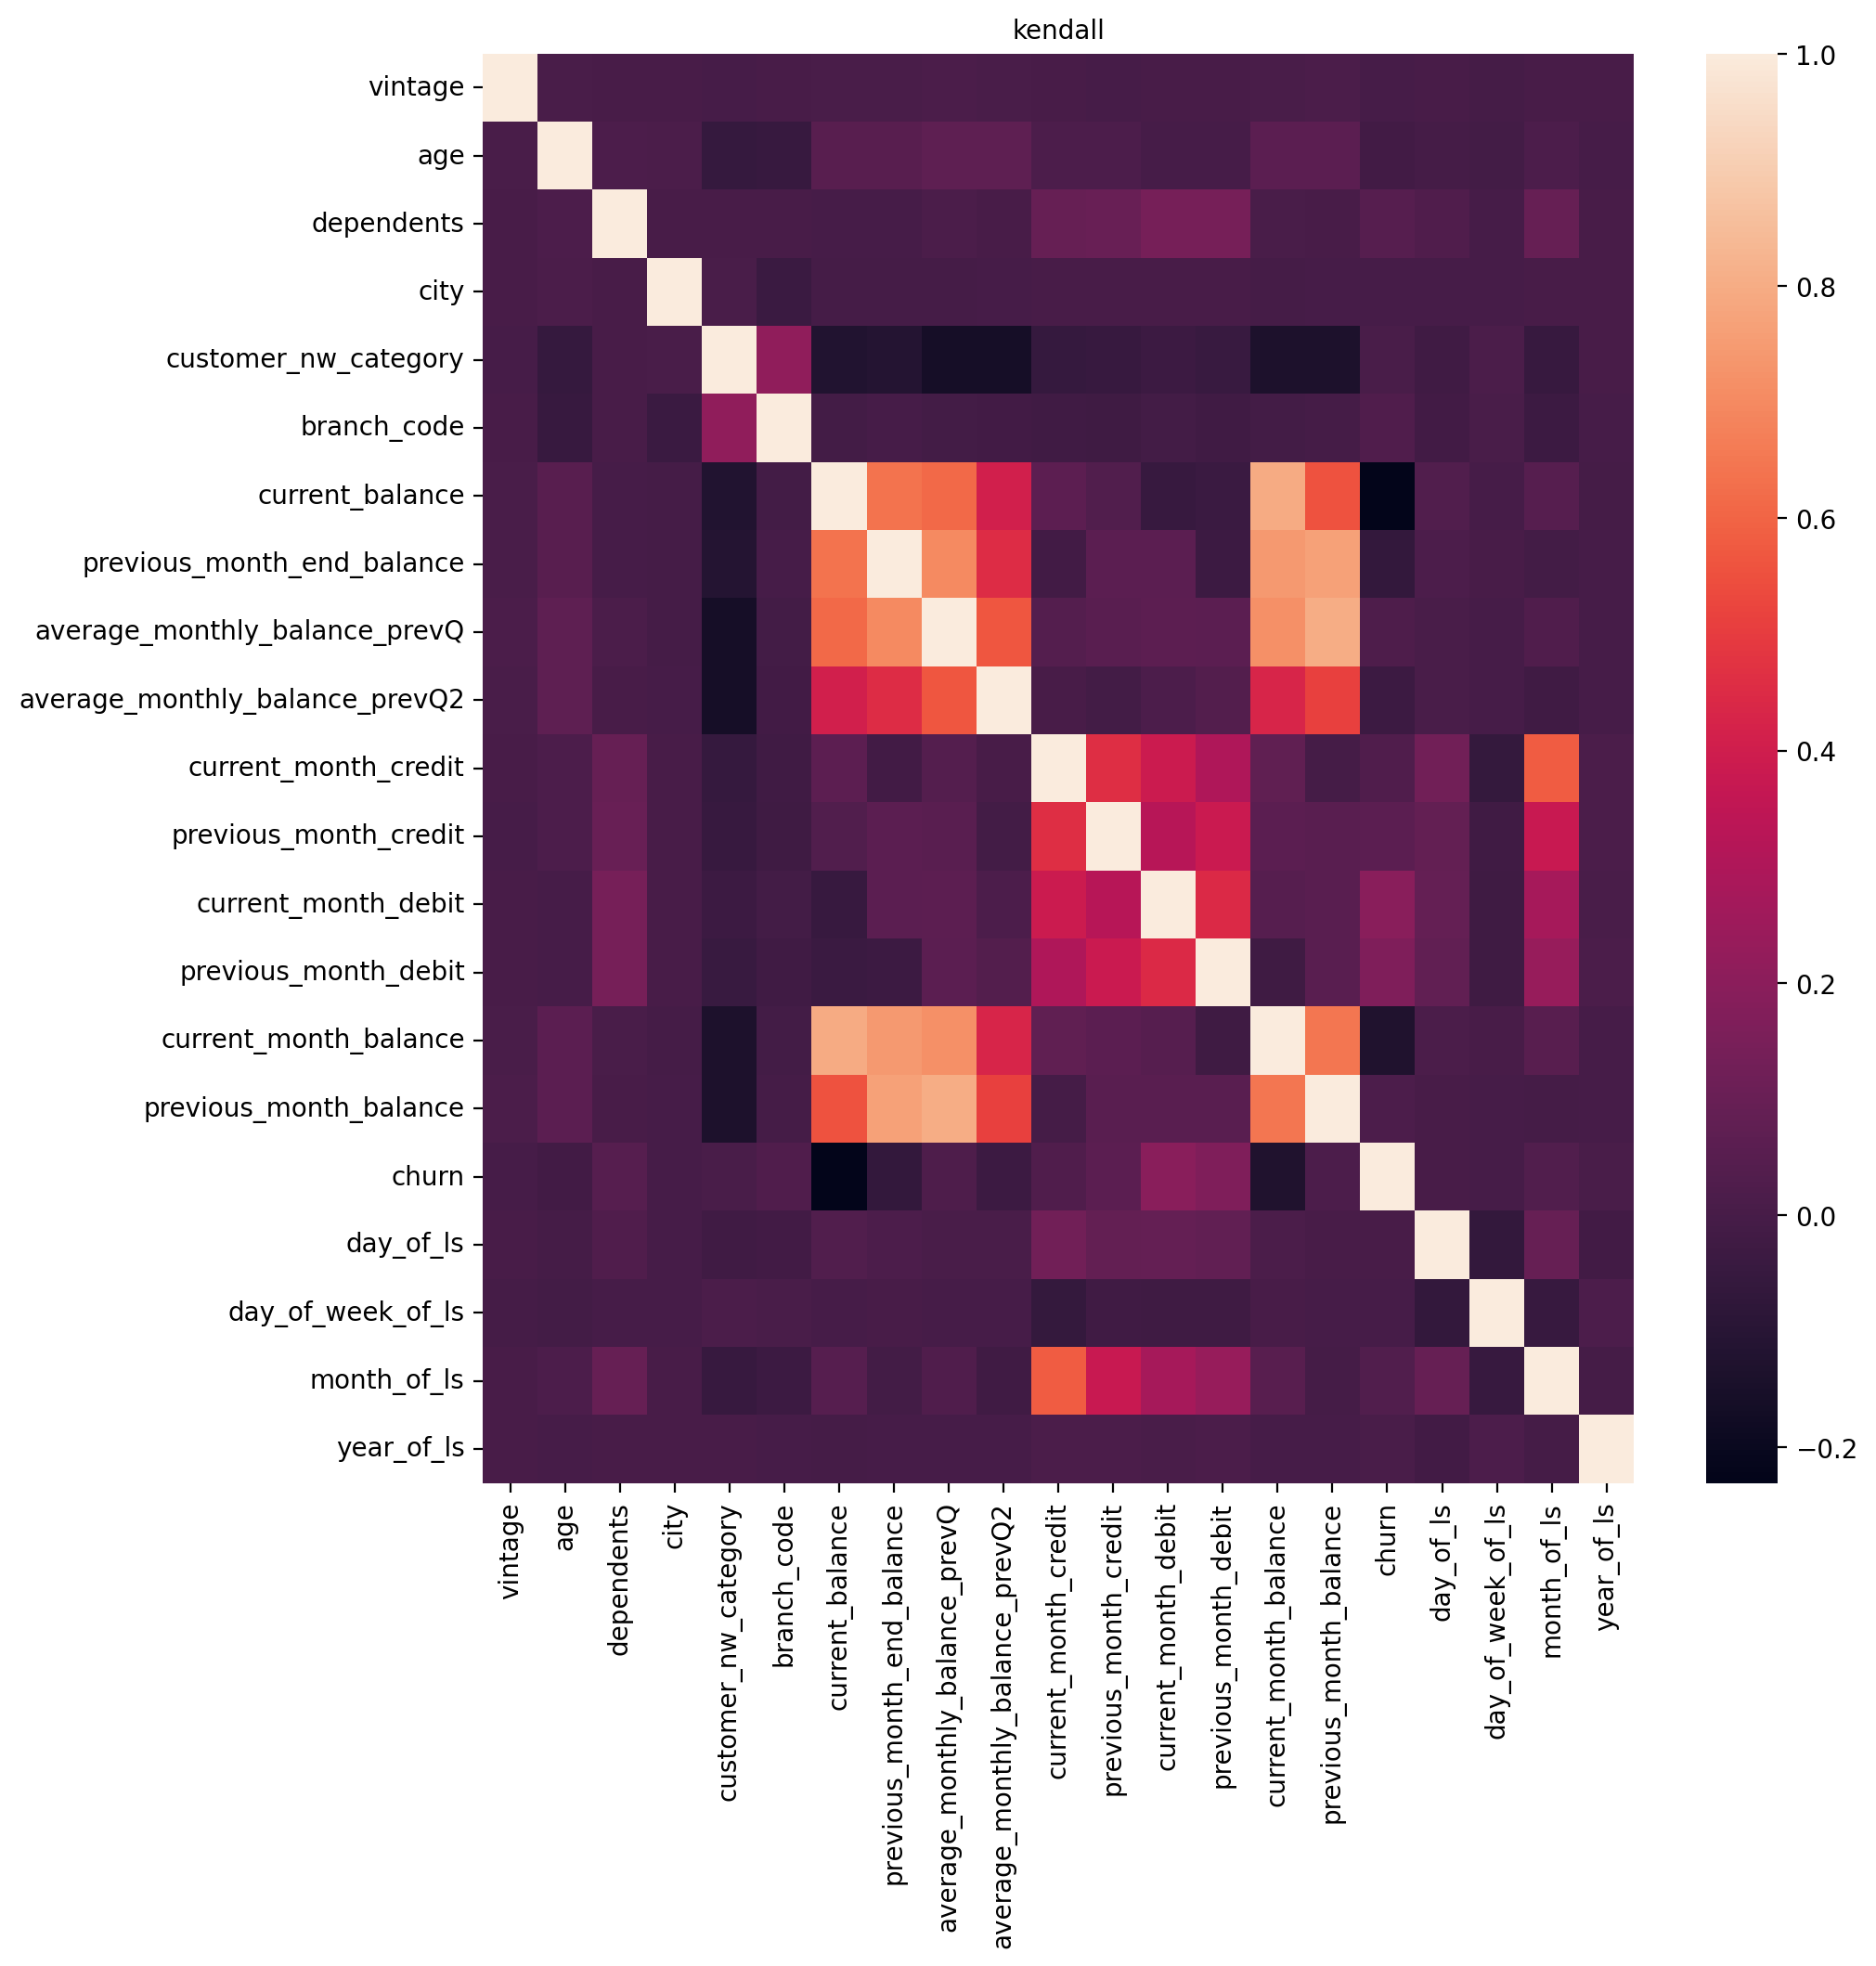

In [23]:
corr_list=['kendall']
plt.figure(figsize=(10,10),dpi=200) 
for j, i in enumerate(corr_list):
        plt.subplot(len(corr_list),1,j+1)
        sns.heatmap(numerical_variables.corr(method=i))
        plt.title('{}'.format(i),fontsize=10) 
        plt.subplots_adjust(hspace=0.5)
        

### Scatterplot

In [24]:
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

#### - sns.pairplot(numerical_variables[transactions])
#### - sns.pairplot(numerical_variables[balance])

 The Values seem too large computation threfrore  I will  sclae it
 
#### Remarks:
- Scaling Does Not help much due to  poor computation power of my pc(tried and tested):
- Another technique
  - Manually look at heat map, convert into a list of  dictionaries individually plot the scatters

In [25]:
dict_plots_1={'current_balance':['previous_month_balance','current_month_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','previous_month_end_balance'],
           'previous_month_end_balance':['previous_month_balance','current_month_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2']}
dict_plots_2={ 'average_monthly_balance_prevQ':['average_monthly_balance_prevQ2','previous_month_balance','current_month_balance',],
          'average_monthly_balance_prevQ2':['previous_month_balance','current_month_balance'] }
dict_plots_3={'current_month_credit':['previous_month_credit','current_month_debit','previous_month_debit'],
             'previous_month_credit':['current_month_debit','previous_month_debit']}
dict_plots_4={'current_month_debit':['previous_month_debit'],'current_month_balance':['previous_month_balance'],'current_month_credit':['month_of_ls'] }


In [26]:
dict_plots_1

{'current_balance': ['previous_month_balance',
  'current_month_balance',
  'average_monthly_balance_prevQ',
  'average_monthly_balance_prevQ2',
  'previous_month_end_balance'],
 'previous_month_end_balance': ['previous_month_balance',
  'current_month_balance',
  'average_monthly_balance_prevQ',
  'average_monthly_balance_prevQ2']}

In [27]:
def Plot_relations(data,dicti):
    size=len(dicti.items())
    plt.figure(figsize=(10,10))
    for key, value_list in dict_plots_1.items():
        for value in value_list:
            sns.scatterplot(x=df[key],y=df[value])

In [28]:
def plot_relations(df, dicti):###   generated using gemini, modified to tailor needs
    """
    Generates scatterplots for each key-value pair in the given dictionary,
    arranging them in subplots within a single figure.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        dicti (dict): A dictionary where keys are column names and values are
            lists of column names to plot against the key.
    """
    """
    Generates scatterplots for each key-value pair in the given dictionary,
    arranging them in subplots within a single figure.  The figure size is
    dynamically adjusted based on the number of subplots.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        dicti (dict): A dictionary where keys are column names and values are
            lists of column names to plot against the key.
    """
    size = len(dicti)  # Number of keys in the dictionary
    # Calculate the number of rows and columns for the subplots
    
    rows = (size )


    position = 1 #keeps track of the subplot position
    # Iterate through the dictionary
    for key, value_list in dicti.items():
        cols=len(value_list)
        
        position = 1 #keeps track of the subplot position
        # Dynamically adjust figure size
        fig_width = cols * 6  # Adjust multiplier as needed for spacing
        fig_height = rows * 6  # Adjust multiplier as needed for spacing
        plt.figure(figsize=(10,10))
        for value in value_list:
            # Create a new subplot in the grid
            plt.subplot(rows, cols, position)
            sns.scatterplot(x=df[key], y=df[value])
            plt.xlabel(key)
            plt.ylabel(value)
            position += 1 #go to the next position

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()  # Display the entire figure with all subplots

# Example usage:


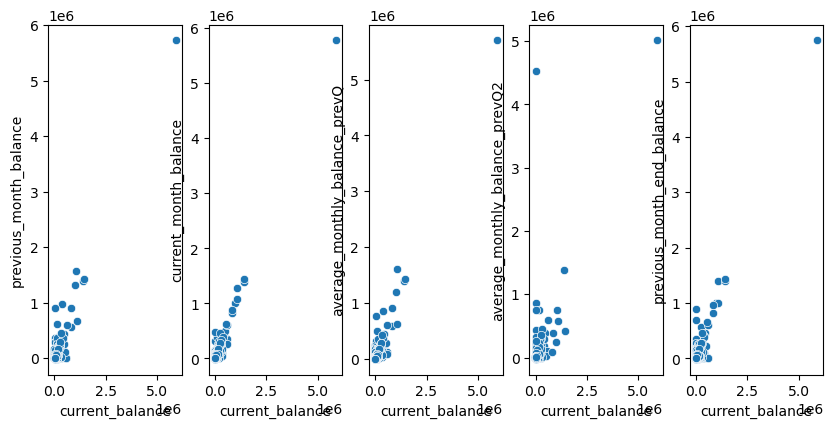

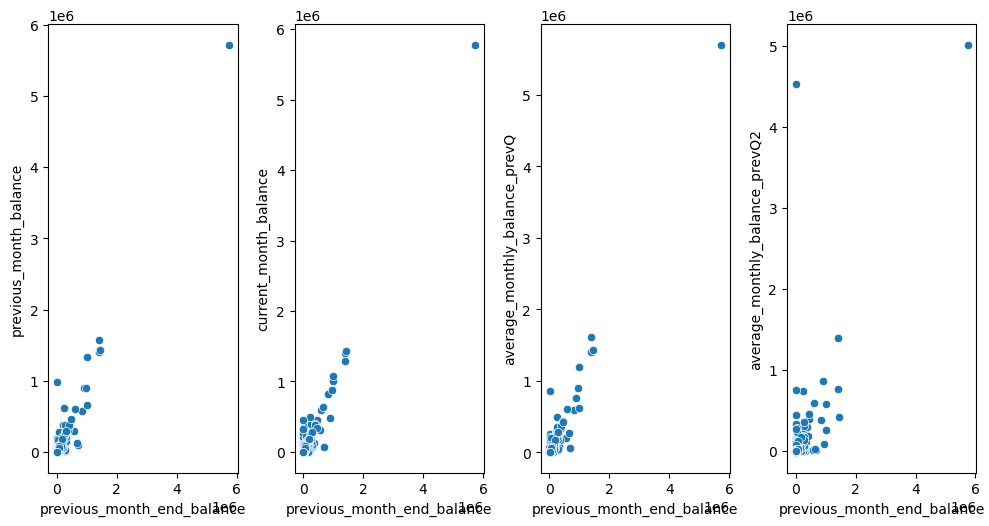

In [29]:
plot_relations(df,dict_plots_1)

#### Conclusions of dict_plots_1
- current_balance:
  - A sort of Linear Relationship With      'previous_month_balance','current_month_balance','average_monthly_balance_prevQ','previous_month_end_balance'
  - 'average_monthly_balance_prevQ2' : cannot say but non linera
  - Outlier definitely present
- previous_month_end_balance
  -  Sort of Linear Relation ship with 'previous_month_balance','current_month_balance','average_monthly_balance_prevQ'
  - 'average_monthly_balance_prevQ2'  Some relationship but definitely non linear
  - Outlier present


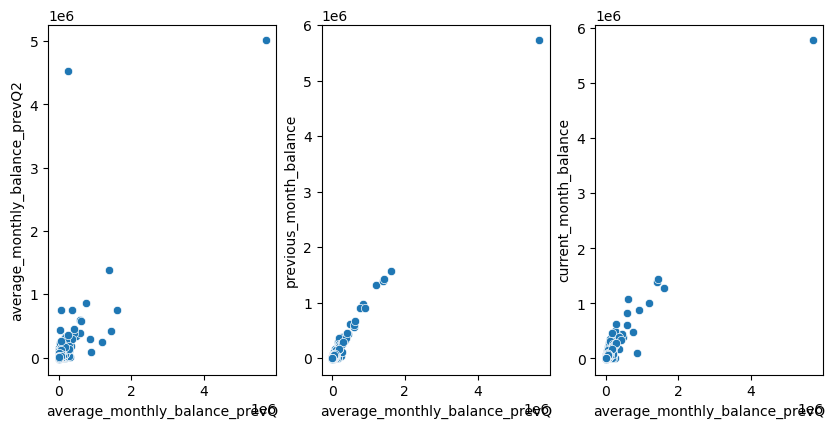

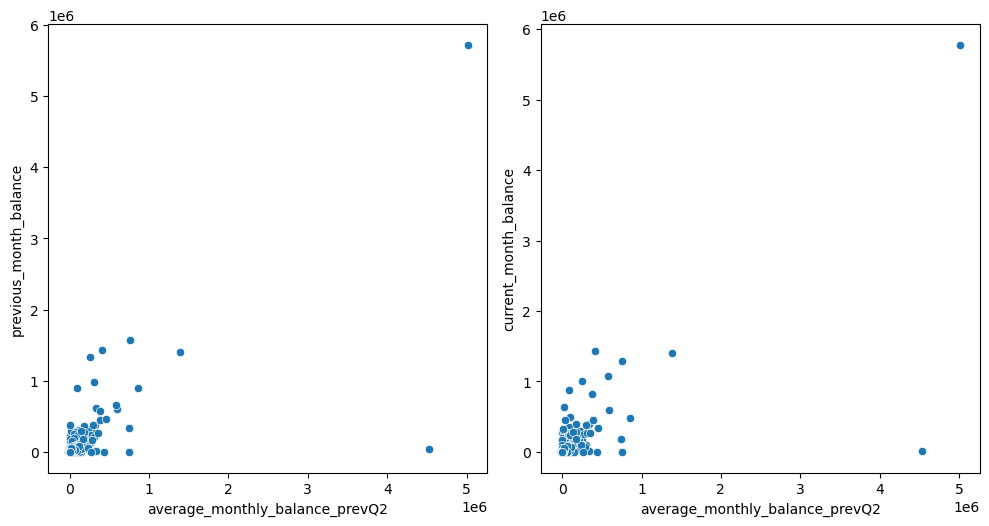

In [30]:
plot_relations(df,dict_plots_2)

#### Conclusions of dict_plots_2
- 'average_monthly_balance_prevQ'
  - Non Linear Relationship with :'average_monthly_balance_prevQ2'
  - Linear Relationship with :'previous_month_balance','current_month_balance'
  - Outliers present
- 'average_monthly_balance_prevQ2'
  - DEnser at smaller values, definitely non linear, but yet they are closely similar
  - Outliers present

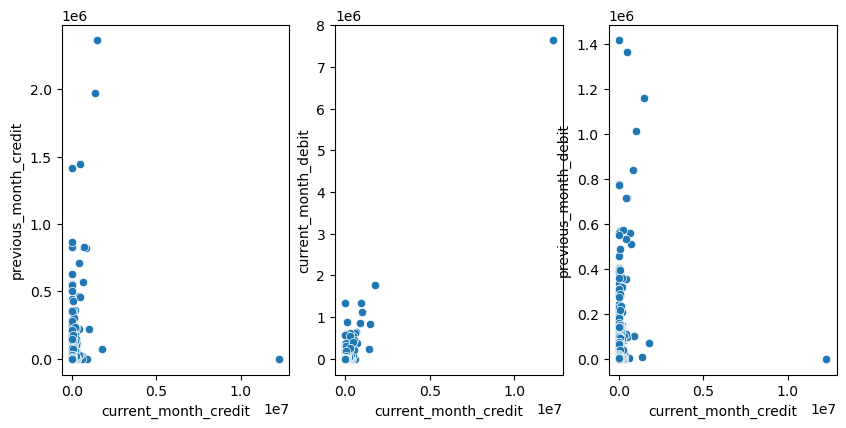

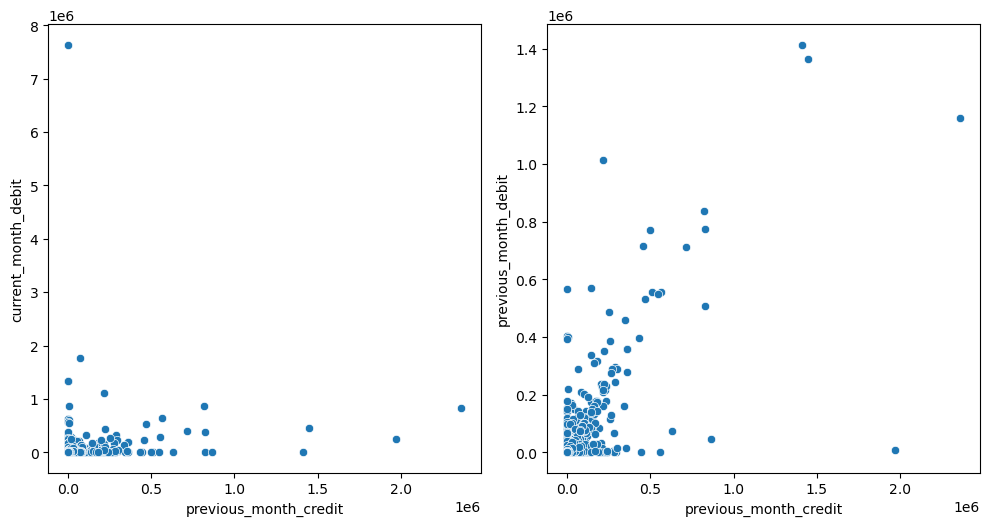

In [31]:
plot_relations(df,dict_plots_3)

#### Conclusions of dict_plots_3
- 'current_month_credit':
  - Vertical straight line of type 'x=constant'
  - Outliers present
- previous_month_credit:
  - Hrizontal line of type 'y=consatnt' 
  - previous month debit : concentrated at bottom left : similar to type 'y=mx'
  - Outliers present

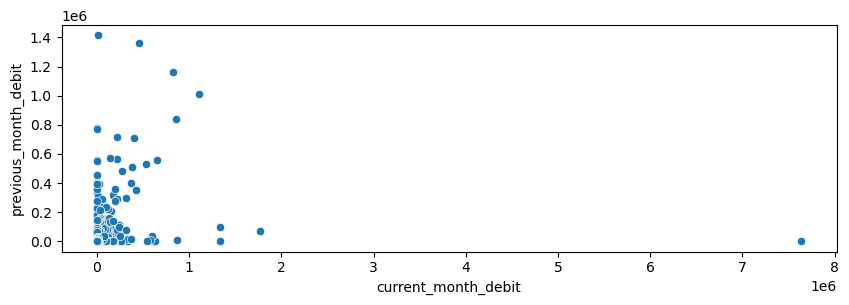

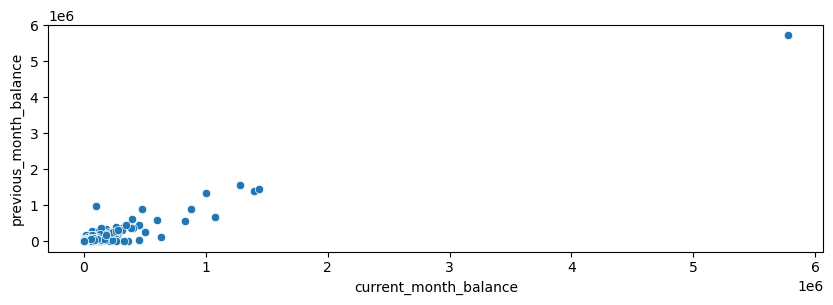

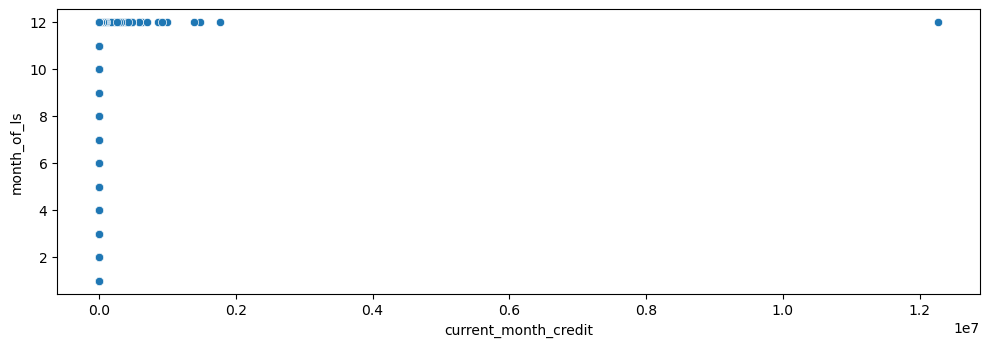

In [32]:
plot_relations(df,dict_plots_4)

#### Conclusions of dict_plots_4 
- current_month_debit vs previous_month_debit :  Sort x='constant line
- previous_month_balance vs current_month_balance : No n linear relationship
- month_of_ls vs current_month_credit :  Horizontal and vertical lines .Relationships are of constant type
- Outliers present

### Bivariate Analysis: Continuous - Categorical Variable
- Two Sample T Test
- Two Sample Z Test


List of Hypothesis and investigation to perform under this combination.

1. Are vintage customers less likely to churn?
2. Are customers with higher average balance less likely to churn?
3. Are customers dropping monthly balance highly likely to churn?



In [33]:
import scipy.stats as st
import math
def two_sample_Z(X1,X2,sig1,sig2,n1,n2):
    d=X1-X2
    ovr_sigma = math.sqrt(sig1**2/n1 + sig2**2/n2)
    Z=(X1-X2)/ovr_sigma
    p_value=2 * (1 - st.norm.cdf(abs(Z)))
    return p_value
    

In [34]:
from scipy.stats import t
def two_sample_T(X1,X2,sig1,sig2,n1,n2):
    ovr_sd = math.sqrt(sig1**2/n1 + sig2**2/n2)
    t_stat = (X1 - X2)/ovr_sd
    deg_free=n1+n2-2
    p_value=2 * (1 - t.cdf(abs(t_stat), deg_free))
    return p_value


In [35]:
 def Bivarte_cont_cat(data, cont, cat, category,Ho,H1):
        x1 = data[cont][data[cat]==category][:]
        x2 = data[cont][~(data[cat]==category)][:]
        m1=x1.mean()
        m2=x2.mean()
        n1=x1.shape[0]
        n2=x2.shape[0]
        std1=x1.std()
        std2=x2.std()
        p_val_z=two_sample_Z(m1,m2,std1,std2,n1,n2)
        p_val_t=two_sample_T(m1,m2,std1,std2,n1,n2)


        
        print("p_valueof t test", p_val_t)
        if p_val_t<0.05:## We can take anyone
            print(f"Rejct :{Ho} \n Accept :{H1}")
        else:
            print(f"Rejct :{H1} \n Accept :{Ho}")

#### 1. Are vintage customers less likely to churn?

In [36]:
Ho="Vintage are less likely to churn"
H1=" vintage Customers are more likely to churn"
Bivarte_cont_cat(df,'vintage','churn',1,Ho,H1)

p_valueof t test 0.4216480657834305
Rejct : vintage Customers are more likely to churn 
 Accept :Vintage are less likely to churn


#### 2.Are customers with higher average quarterly  balance less likely to churn?

In [37]:
Ho="customers with higher average balance less likely to churn"
H1="customers with higher average balance  likely to churn"
Bivarte_cont_cat(df, 'average_monthly_balance_prevQ', 'churn', 1,Ho,H1)

p_valueof t test 0.01722468887588957
Rejct :customers with higher average balance less likely to churn 
 Accept :customers with higher average balance  likely to churn


In [38]:
Bivarte_cont_cat(df, 'average_monthly_balance_prevQ2', 'churn', 1,Ho,H1)

p_valueof t test 0.03066168114271184
Rejct :customers with higher average balance less likely to churn 
 Accept :customers with higher average balance  likely to churn


#### 3.Are customers dropping monthly balance highly likely to churn?

In [39]:
Ho='customers dropping monthly balance highly likely to churn'
H1='customers dropping monthly balance less likely to churn'
difference = df[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']
Bivarte_cont_cat(difference,'bal_diff','churn',1,Ho,H1)

p_valueof t test 3.7969627442180354e-14
Rejct :customers dropping monthly balance highly likely to churn 
 Accept :customers dropping monthly balance less likely to churn


In [40]:
df['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

#### 4. Do the self employed Hold more monetary power on comparison with rest of the group

In [41]:
Ho='self employed Hold more monetary power on comparison with rest of the group'
H1='Other classes Hold more monetary power on comparison with rest of the group'
Bivarte_cont_cat(df,'current_balance','occupation','self_employed',Ho,H1)

p_valueof t test 0.07605252408124863
Rejct :Other classes Hold more monetary power on comparison with rest of the group 
 Accept :self employed Hold more monetary power on comparison with rest of the group


### Bivariate Analysis : Categorical categorical

#### List of Hypothesis to check under this combination
1.   Are females less likely to churn than males?
2.   Are young customers more likely to churn?
3.   Are customers in the lower income bracket more likely to churn?
4.   Are customers with dependent(s) less likely to churn?
5.   Customers with an average family size less than 4 are more likely to churn?
6.   Customers whose last transaction was more than 6 months ago, do they have higher churn rate?
7.   Possibility that cities and branch code with very few accounts may lead to churning.
**Missing Values** - finding behaviour

**Gender**: 
  *  Do missing values churn more?

**Dependents**:
  *  Do missing values have any relation with churn?

**Occupation:**
   * Do they have some relation with churn?

In [42]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

#### 1. Are females less likely to churn than males?

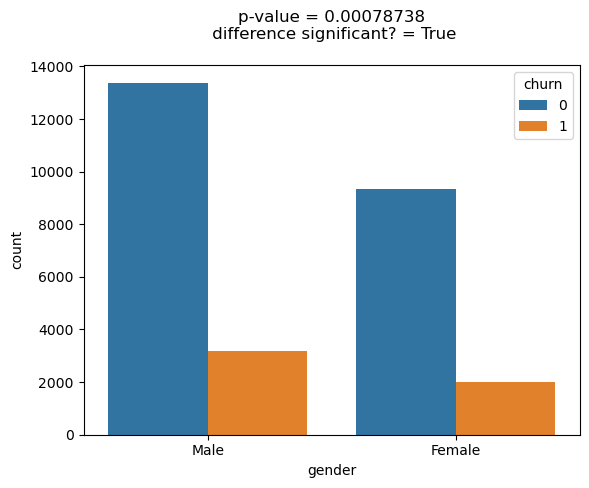

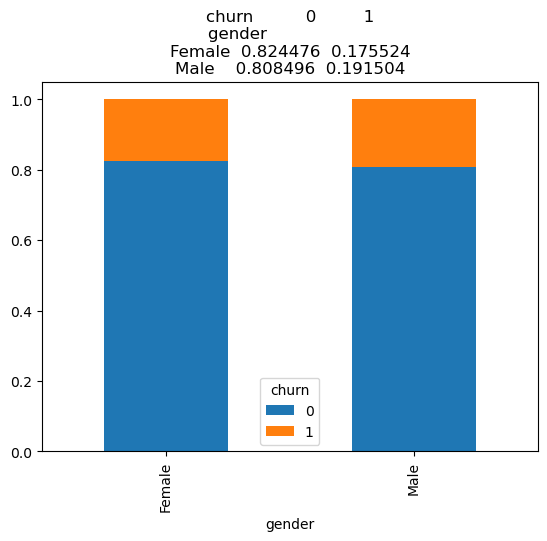

In [43]:
BVA_categorical_plot(df,'churn','gender')

#### **Result:**

the difference between the males and females customer churning is significant.

#### 2. Are young customers more likely to churn?

In [44]:
churn = df[['churn', 'age']][:]
def age_group(x):
    if x >= 80:
        return 'very old'
    elif x < 80 & x >= 60:
        return 'senior citizen'
    elif x < 60 & x >= 18:
        return 'adult'
    else:
        return 'young'
churn['age_group'] = churn['age'].apply(lambda x: age_group(x))


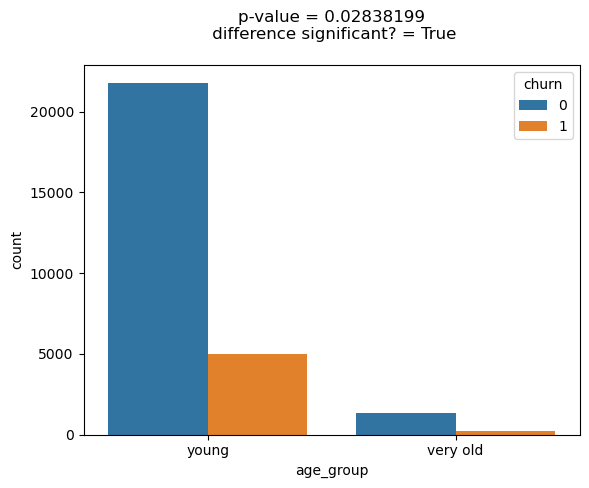

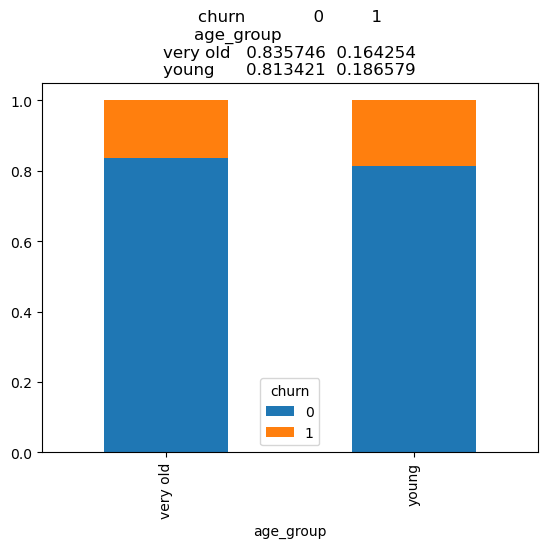

In [45]:
BVA_categorical_plot(churn, 'churn', 'age_group')

#### Result:
Age group has significant effect on the churning rate.

### 3. Customers from low income bracket more likely to churn

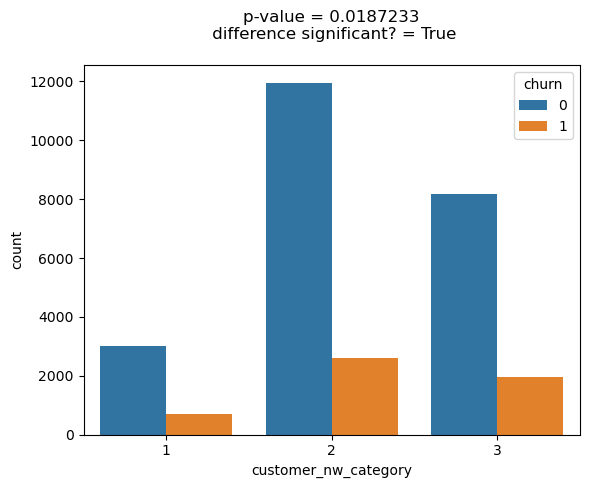

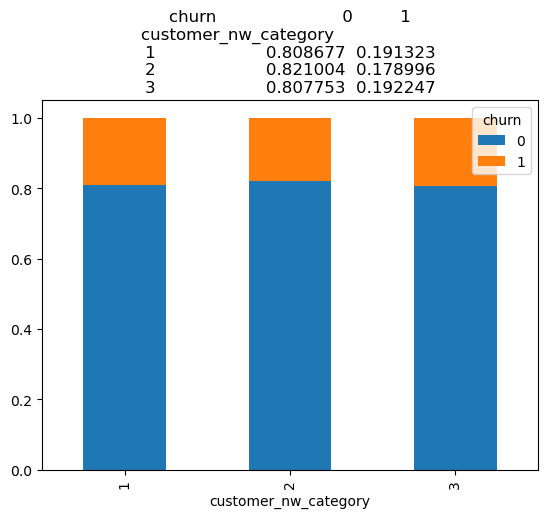

In [46]:
BVA_categorical_plot(df, 'churn', 'customer_nw_category')

#### Result:
Different income brackets have significant effect on the churn rate.

#### 4. Are customers with dependent(s) less likely to churn?
- Dependents to be segregated

In [47]:
def family_segragation(x):
    if x==0:
        return 'single'
    elif x>=1 and x<=4:
        return 'small family'
    elif x>=5 and x<=9:
        return 'large family'
    else:
        return 'joint family'
    
family=df[['churn','dependents']][:]

family['segment']=family['dependents'].apply(family_segragation)
family.head()

,churn,dependents,segment
0,0,0.0,single
1,0,0.0,single
2,0,0.0,single
3,1,NaN,joint family
4,1,2.0,small family


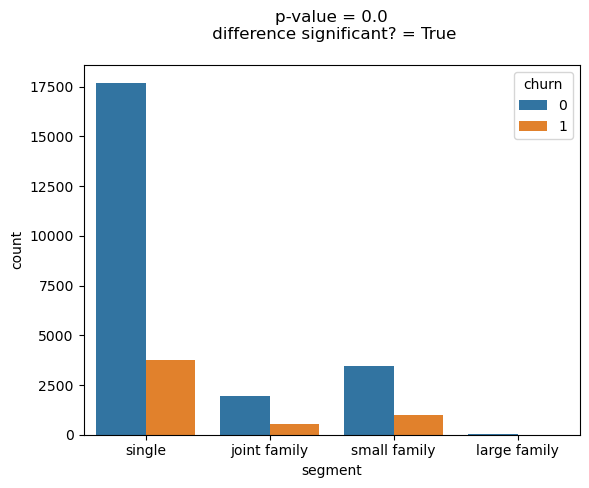

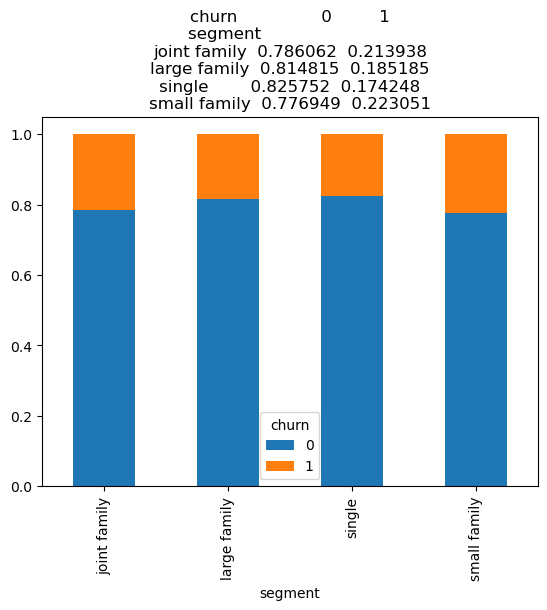

In [48]:
BVA_categorical_plot(family,'churn','segment')

#### Result :
 - Churn Rate is significantly affected by family size

#### 6. Customers whose last transaction was more than 6 months  before , is there a significant effect on churn rate?

In [49]:
transactions=df[['churn','month_of_ls']][:]
transactions['Category']=transactions['month_of_ls'].apply(lambda x : "Before 6 months" if x<7 else 'within 6 months')

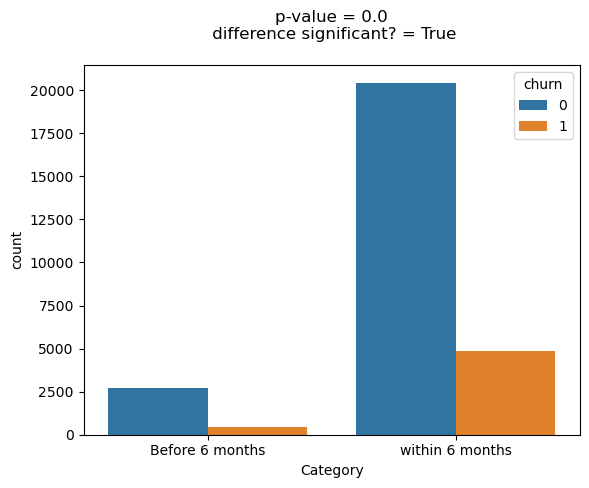

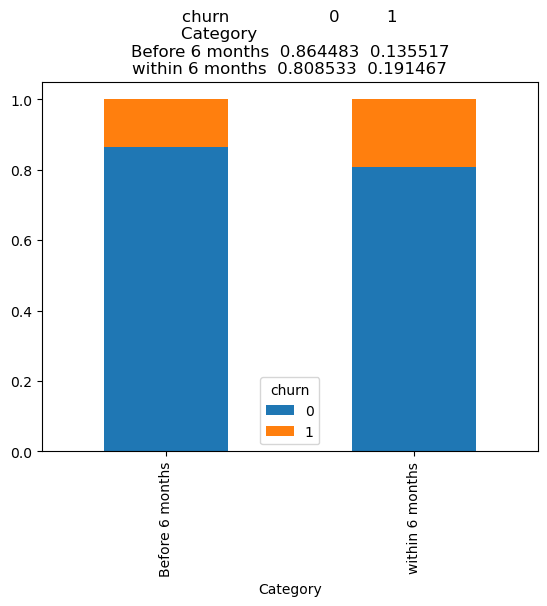

In [50]:
BVA_categorical_plot(transactions,'churn','Category')

#### Result:
- There is a significant difference observed in the churn rate

#### 7. Possibility that cities and branch code with very few accounts may lead to churning.

In [51]:
city_count=df['city'].value_counts()
city_list_low=city_count[city_count<300]
type(city_list_low)

pandas.core.series.Series

In [52]:
city_df=df[['churn','city']][:]
city_df['city_category']=city_df['city'].apply(lambda x: 'low account' if x in city_list_low else 'high account')


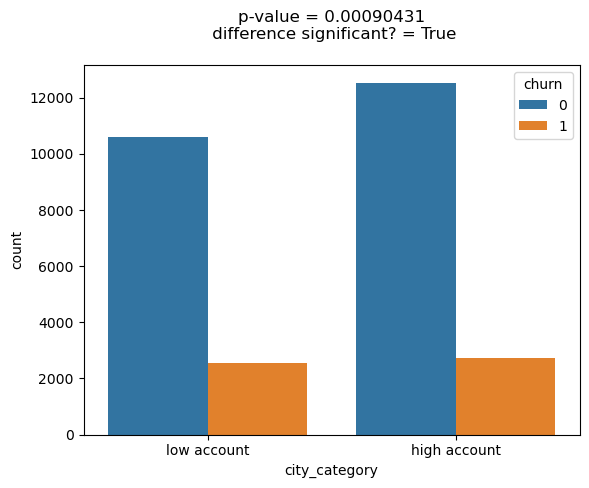

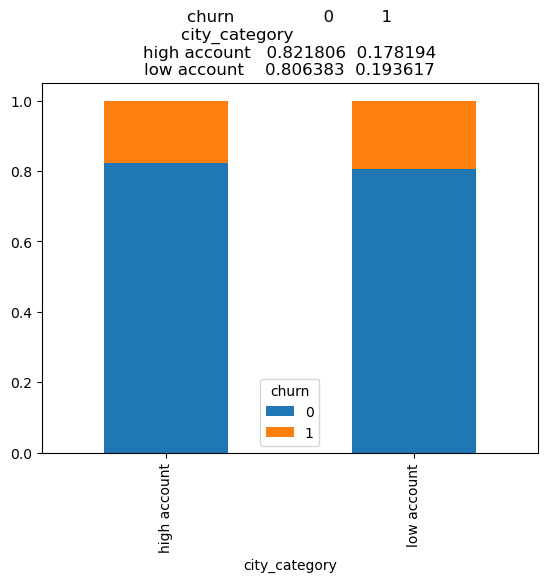

In [53]:
BVA_categorical_plot(city_df, 'churn', 'city_category')

#### Result :
- There is a significant churning rate i high account cities and low account cities

## EDA is a 5 step process:
- Variable identification
- Univariate Analysis:
  -  Numerical
  - Categorical
- Bivariate 
  - Cont Cat: t,2t,z,2z test
  - Cat Cat : chi squre
- Missing Value Treatment
- Outlier Removal
#### I had made the mistake of missing value treatment: By performing it before Univariate Analysis - Now correcting it
- The necessary changes have been made

In [54]:
df.isna().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
day_of_ls                         3223
day_of_week_of_ls                 3223
month_of_ls                       3223
year_of_ls                        3223
dtype: int64

### Chi2 Analysis of the impact of missing values

#### Do the missing gender have some significance with respect to churn rate

In [55]:
y=df['gender'].value_counts().index
gender_info=df[['churn','gender']][:]
gender_info['missing_status']=gender_info['gender'].apply(lambda x: 'not missing' if x in y else 'missing' )


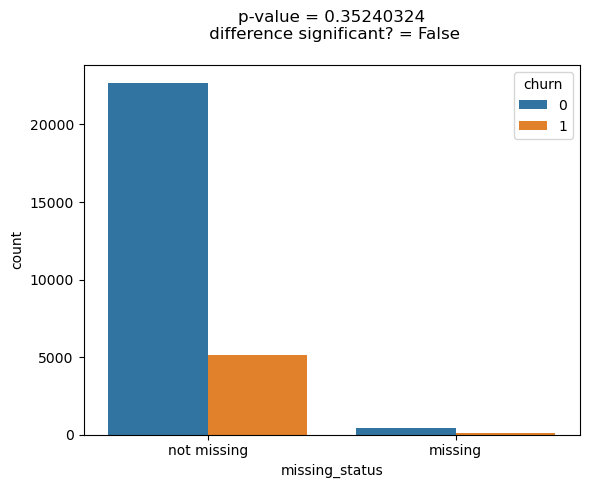

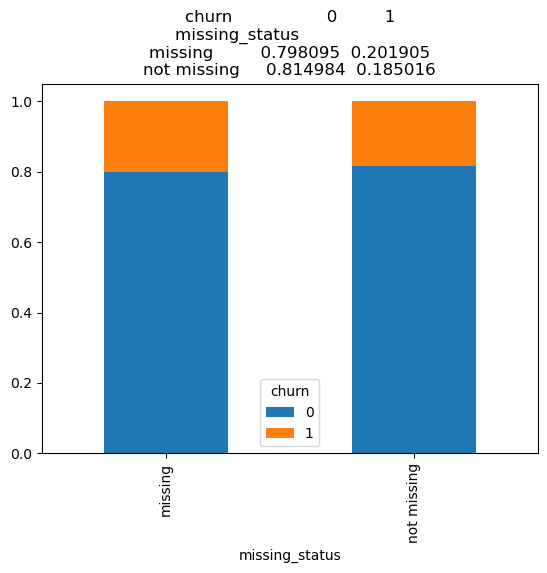

In [56]:
BVA_categorical_plot(gender_info,'churn','missing_status')

####  Result:
Misiing values of gender hold no statitistical significance

#### Do missing values of dependents hold statistical significance

In [57]:
y=df['dependents'].value_counts().index
dependent_info=df[['churn','dependents']][:]
dependent_info['missing_status']=dependent_info['dependents'].apply(lambda x: 'not missing' if x in y else 'missing' )


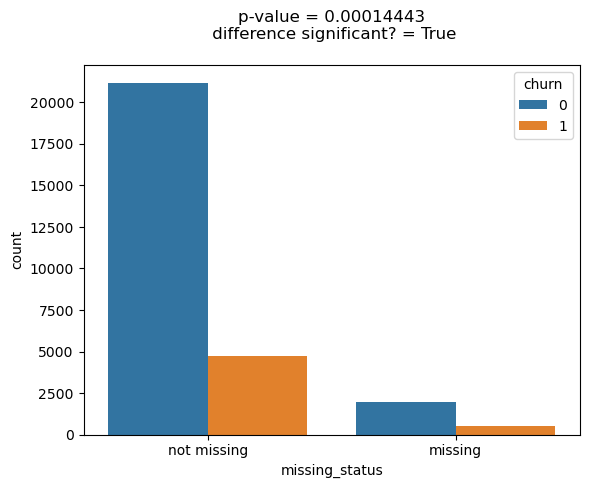

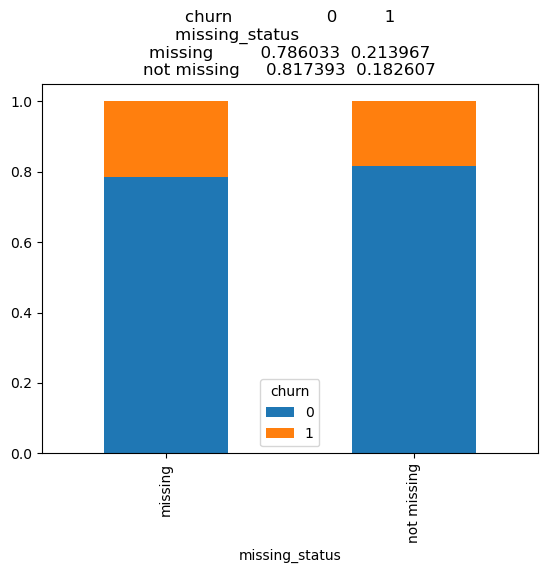

In [58]:
BVA_categorical_plot(dependent_info,'churn','missing_status')

#### Result
The missing dependent info plays a significance in churning rate

#### Does missing Values  in  occupation Play a role in churning rate

In [59]:
y=df['occupation'].value_counts().index
occupation_info=df[['churn','occupation']][:]
occupation_info['missing_status']=occupation_info['occupation'].apply(lambda x: 'not missing' if x in y else 'missing' )


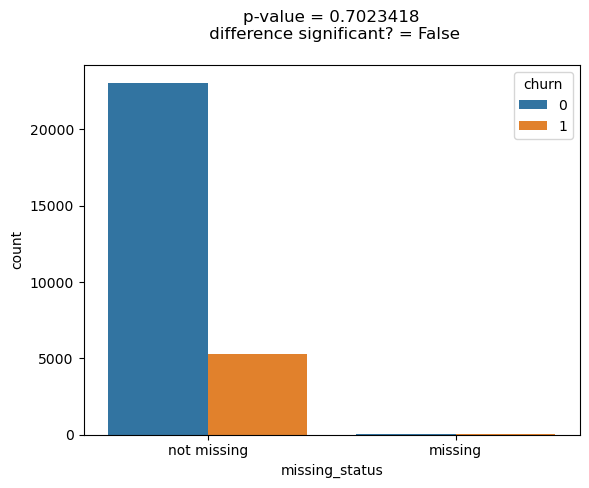

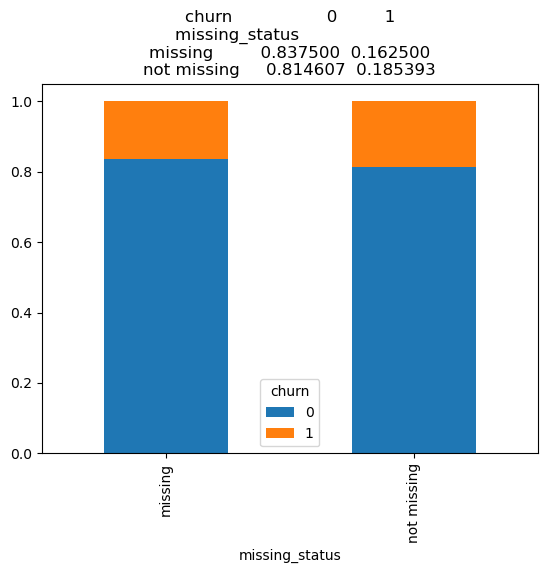

In [60]:
BVA_categorical_plot(occupation_info,'churn','missing_status')

#### Result:
Missing occupation is of no statistical significance

In [61]:
df.isna().sum()/len(df)*100

vintage                            0.000000
age                                0.000000
gender                             1.849764
dependents                         8.678035
occupation                         0.281869
city                               2.829258
customer_nw_category               0.000000
branch_code                        0.000000
current_balance                    0.000000
previous_month_end_balance         0.000000
average_monthly_balance_prevQ      0.000000
average_monthly_balance_prevQ2     0.000000
current_month_credit               0.000000
previous_month_credit              0.000000
current_month_debit                0.000000
previous_month_debit               0.000000
current_month_balance              0.000000
previous_month_balance             0.000000
churn                              0.000000
day_of_ls                         11.355789
day_of_week_of_ls                 11.355789
month_of_ls                       11.355789
year_of_ls                      

### Missing value Treatment

In [75]:
df['gender']=df['gender'].fillna('Male')
x1=df['customer_nw_category'].mode()[0]
df['customer_nw_category']=df['customer_nw_category'].fillna(x1)
x2=df['city'].mode()[0]
df['city']=df['city'].fillna(x2)
x3=df['dependents'].mode()[0]
df['dependents']=df['dependents'].fillna(x3)## But this definitely leads to bias
x4=df['day_of_ls'].mode()[0]
df['day_of_ls']=df['day_of_ls'].fillna(x4)
x5=df['day_of_week_of_ls'].mode()[0]
df['day_of_week_of_ls']=df['day_of_week_of_ls'].fillna(x5)
x6=df['month_of_ls'].mode()[0]
df['month_of_ls']=df['month_of_ls'].fillna(x6)
x7=df['year_of_ls'].mode()[0]
df['year_of_ls']=df['year_of_ls'].fillna(x7)
df['occupation']=df['occupation'].fillna(df['occupation'].mode()[0])


### Note:
 As this is a beginner project statistical signficant categorical variable 'dpendents' is imputed using central Tendency, However this is not preferable as it leads to bias, Advanced Methods  will be used in future to apply proper imputation

In [77]:
df['churn'].value_counts()/len(df) 

churn
0    0.814671
1    0.185329
Name: count, dtype: float64

In [78]:
#Its a highly imbalanced dataset : SMOTE can be used but it leads too much generation of synthetic data